In [1]:
import cv2, os, glob
import matplotlib.pyplot as plt

from fastai.vision.all import *

from utils.heatmap_point import *
from utils.draw_and_cal_angle import *

learn = load_learner('./utils/legPoint.pkl') # load trained model

def drawAngleVideo(inputs):
    vid_list = [inputs] if len(inputs[0])==1 else inputs
    
    for vid in vid_list:
        
        # get video basic arg 
        cap = cv2.VideoCapture(vid)
        vid_w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        vid_h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        vid_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        # set video save path 
        vid_name = vid.split('/')[-1][:-4]
        save_path = Path('./result') / video_name
        save_path.mkdir(parents=True, exist_ok=True)

        # set video writer arg
        delay = round(1000/30)
        out_w, out_h = (640, 480)
        fourcc = cv2.VideoWriter_fourcc(*"MJPG")
        out = cv2.VideoWriter(f'./result/videos/{vid_name}.avi', fourcc, 30, (out_w, out_h))


        # draw leg line and calculate angle of video 
        c = 0
        while c < vid_frames:
            c += 1

            _, image = cap.read()
            im = preprocessImage(image)

            # predict keypoints
            predPoints, _, _ = learn.predict(im)
            predPoints = np.array(predPoints, dtype=np.uint)

            # naming keypoints
            knee_point   = tuple(predPoints[0])
            ankle_point  = tuple(predPoints[1])
            ground_point = tuple((predPoints[1][0],predPoints[0][1]))

            # pointing keypoints  
            im = drawPredPoints(im, predPoints)

            # draw lines
            im = cv2.circle(im, ground_point, 2, (255, 0, 0), -1)
            im = cv2.line(im, knee_point, ankle_point, color=(0, 0, 0), thickness=1)
            im = cv2.line(im, knee_point, ground_point, color=(0, 0, 0), thickness=1)

            # calculate angle
            points = [knee_point, ground_point, ankle_point]
            angle = cal_angle(knee_point=knee_point, ground_point=ground_point, ankle_point=ankle_point, 
                              scaling=True, origin_width=vid_w, origin_height=vid_h)

            # draw angle figure
            cv2.putText(im, "%0.3f"%float(angle), 
                    org=((int(knee_point[0]+30), int(knee_point[1]-15))), 
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.4, 
                    color=(255,255,255), thickness=1
                   )        

            im = Image.fromarray(im)
            im = im.resize((out_w,out_h))
            im = np.array(im)
            im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)

            out.write(im)

        cap.release()
        out.release()

In [38]:
fourcc = cv2.VideoWriter_fourcc(*"MJPG")
out = cv2.VideoWriter('./output.avi', fourcc, 30, (1920, 1080))
delay = round(1000/30)

for im in tqdm.tqdm(im_list):
    im = cv2.imread(im)
    

In [111]:
for i in points:
    print(i[0]*1920/224, i[1]*1080/224)

788.5714285714286 689.4642857142857
1500.0 689.4642857142857
1500.0 327.85714285714283


In [113]:
[[round(i[0]*1920/224), round(i[1]*1080/224)] for i in points]

[[789, 689], [1500, 689], [1500, 328]]

In [114]:
cal_angle(*[[round(i[0]*1920/224), round(i[1]*1080/224)] for i in points], False, 0, 0)

26.918525982884805

In [ ]:
#point 의 비율을 바로 옮길 건지는 오차 계산좀

In [109]:
points[0][0]*1920/224

788.5714285714286

In [110]:
points[0][1]*1080/224

689.4642857142857

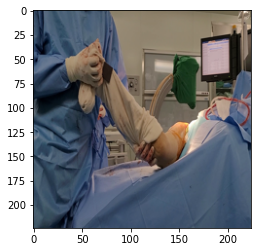

In [104]:
plt.imshow(im)

In [67]:
dic.keys()

dict_keys(['video', 'points', 'angles', 'max_angle'])

In [69]:
dic['max_angle']

[45.754]

In [ ]:
plt.imshow(im)

In [ ]:
plt.imshow(im)

In [ ]:
ankle_point, knee_point, ground_point

In [ ]:
12/90*(180/math.pi)

In [ ]:
math.atan2(12, 90)

In [ ]:
math.asin()

In [ ]:
x1, y1 = ankle_point
x2, y2 = knee_point

In [ ]:
import  math

In [ ]:
rad = math.atan2(y2 - y1, x2 - x1)

In [ ]:
rad

In [ ]:
(rad*180)/math.pi

In [ ]:
print(

In [ ]:

arr = [ankle_point[0], ankle_point[1], knee_point[0], knee_point[1]]
rad = math.atan2(arr[3] - arr[1], arr[2] - arr[0])

In [83]:
(rad*180)/math.pi

3.727212517340059e-17

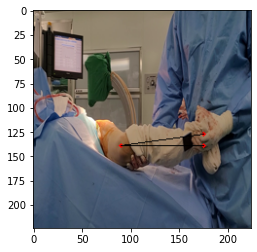

In [84]:
plt.imshow(im)

In [ ]:

# Get angle in radians and then convert to degrees

# Basically doing angle <- angle mod 360
ang_deg = math.degrees(angle)%360

if ang_deg-180 >= 0:
    # As in if statement
    return 360 - ang_deg
else: 
    return ang_deg

In [35]:
plt.imshow(im)

NameError: name 'im' is not defined

In [49]:
im = preprocessImage(frame)

#predict points
predPoints, _, _ = learn.predict(im)
predPoints = np.array(predPoints, dtype=np.uint)

if predPoints[0][0] > predPoints[0][1]:
    im, predPoints = reverseImage(im, predPoints)

#draw points
groundPoint = np.array([(predPoints[0]), [predPoints[1][0], predPoints[0][1]]])   
im = drawPredPoints(im, predPoints)

#naming points
ankle_point = (predPoints[1][0], predPoints[1][1])
ground_point = (int(groundPoint[1][0]), int(groundPoint[1][1]))
knee_point = (predPoints[0][0], predPoints[0][1])

#draw others
im = cv2.line(im, predPoints[0], predPoints[1], color=(0, 0, 0), thickness=1)
im = cv2.circle(im, (int(groundPoint[1][0]), int(groundPoint[1][1])), 2, (255, 0, 0), -1)
im = cv2.line(im, predPoints[0], groundPoint[1], color=(0, 0, 0), thickness=1)

#calculate angle

angle = ang([ankle_point, knee_point], [ground_point, knee_point])

#draw angle figure
im = cv2.ellipse(im, center=c, axes=(15,15), angle=-angle, startAngle=0, endAngle=angle, color=(255, 255, 255), lineType=cv2.LINE_AA, thickness=1)

#putText
cv2.putText(im, "%0.2f"%float(angle), org=((int(c[0]+15), int(c[1]-15))), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.4, color=(255,255,255), thickness=1)

return im

/tmp/ipykernel_61688/241081282.py:8: RuntimeWarning: overflow encountered in ulong_scalars
  vA = [(lineA[0][0]-lineA[1][0]), (lineA[0][1]-lineA[1][1])]
/tmp/ipykernel_61688/241081282.py:4: RuntimeWarning: overflow encountered in ulong_scalars
  return vA[0]*vB[0]+vA[1]*vB[1]


ValueError: math domain error